<a href="https://colab.research.google.com/github/Sangee-28/GuviTasks/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

<Figure size 1152x360 with 0 Axes>

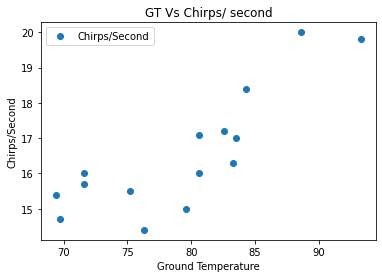

In [4]:
plt.figure(figsize=(16,5))
df.plot(x="Ground Temperature" , y="Chirps/Second", style ="o")
plt.title('GT Vs Chirps/ second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [5]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [6]:
X = df.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, 1].values # target as arrays

from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [7]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

In [8]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * ground temperature + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [9]:
print(regressor.intercept_)
print(regressor.coef_)

28.28377996566045
[3.14155311]


In [10]:
y_pred = regressor.predict(X_test)  # given the features of the test dataset, it will give the final predictions
y_pred

array([76.97785312, 78.54862968, 77.60616374])

In [11]:
pre_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pre_df

,Actual,Predicted
0,75.2,76.977853
1,71.6,78.548630
2,71.6,77.606164


In [12]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -9.129423495863934


In [13]:
regressor.predict([[95]]) #extrapolating the data

array([326.73132512])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [14]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


<Figure size 1152x360 with 0 Axes>

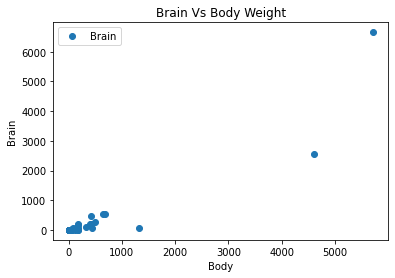

In [15]:
plt.figure(figsize=(16,5))
df.plot(x="Body" , y="Brain", style ="o")
plt.title('Brain Vs Body Weight')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

In [16]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [17]:
from sklearn.model_selection import train_test_split

from sklearn import metrics




X = df.iloc[:, :-1].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, 1].values # target as arrays


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)


from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * ground temperature + c  
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)  # given the features of the test dataset, it will give the final predictions
y_pred

print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

10.217072100411485
[1.73686716]
R2- SCORE: -0.21797069377403622


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [18]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

In [24]:
features = list(df.columns.values[0:-1])
features


['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [25]:
# S1.2: Build a linear regression model using the sklearn module by including all the features listed above.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[features] 
y = df['Salary']

# Splitting the DataFrame into the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) # Test set will have 33% of the values.

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# Build linear regression model using the 'sklearn.linear_model' module.
sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train_reshaped)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_[0]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.

# Print the names of the features along with the values of their corresponding coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_[0])):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.


Constant       10591.567669
Sex             2483.208233
Rank            6457.395195
Year            495.759628
Degree          -1574.802819
YSdeg           -186.120664


In [26]:
# S1.3: Evaluate the linear regression model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = sklearn_lin_reg.predict(X_train)
y_test_pred = sklearn_lin_reg.predict(X_test)

print(f"Train Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_train_reshaped, y_train_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_train_reshaped, y_train_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train_reshaped, y_train_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train_reshaped, y_train_pred):.3f}")
      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test_reshaped, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reshaped, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test_reshaped, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reshaped, y_test_pred):.3f}")

Train Set
--------------------------------------------------
R-squared: 0.860
Mean Squared Error: 5336623.717
Root Mean Squared Error: 2310.113
Mean Absolute Error: 1676.777


Test Set
--------------------------------------------------
R-squared: 0.790
Mean Squared Error: 5701120.547
Root Mean Squared Error: 2387.702
Mean Absolute Error: 1902.595


In [28]:
 # Build a linear regression model using the 'statsmodels.api' module.
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
sm_lin_reg = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
sm_lin_reg.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     10591.567669
Sex        2483.208233
Rank       6457.395195
Year        495.759628
Degree    -1574.802819
YSdeg      -186.120664
dtype: float64

In [29]:
print(sm_lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     34.38
Date:                Thu, 21 Apr 2022   Prob (F-statistic):           4.06e-11
Time:                        13:40:00   Log-Likelihood:                -311.58
No. Observations:                  34   AIC:                             635.2
Df Residuals:                      28   BIC:                             644.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.059e+04   1456.337      7.273      0.0